### Goal is to classify the patients into the respective labels using the attributes from their voice recordings

### Import necessary libraries

In [150]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from os import system

### Import data

In [151]:
data = pd.read_csv("Data - Parkinsons.csv")
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


- The data looks all to be continous except the name and the status field.
- The vocal fundamental frequency values have a higher values compared to other fields
- The spread1 value is negative
- So will have to normalize the data so no column gets extra influence

### Exploratory Data Analysis
- Shape
- Meta info
- Descriptive stats
- Distributions
- Correlations

In [152]:
data.shape

(195, 24)

The shape looks like there are 195 rows and 24 columns

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

- The dataset is of shape (195,24)
- No sign of missing values
- All the columns are read as numeric columns (either float or int) except for name
- Continuous and kinda continuous columns :  All columns except Name and Status      
- Categorical columns : 'Status'
- String Columns: 'Name'

In [154]:
data.describe().T # descriptive statistics of each of the attributes

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


- The mean of vocal fundamental frequency value show that the data needs to be normalized
- The spread1 has the min and max as negative showing that all the values are negative for the column
- MDVP:Fhi(Hz) range is from 102 to 592 which is a stark contrast to other columns in the data set
- Apart from the vocal fundamental frequency values the HNR column is the column with next highest range.
- All the other columns have values which are around 0 or below with the next highest being D2 Column



In [155]:
data.columns # checking the column names

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Checking Correlation

In [156]:
data.corr().transpose()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


- There is too much columns and it is hard to find the correlation in this table.
- So we will plot a heatmap and then we can easily find the correlation

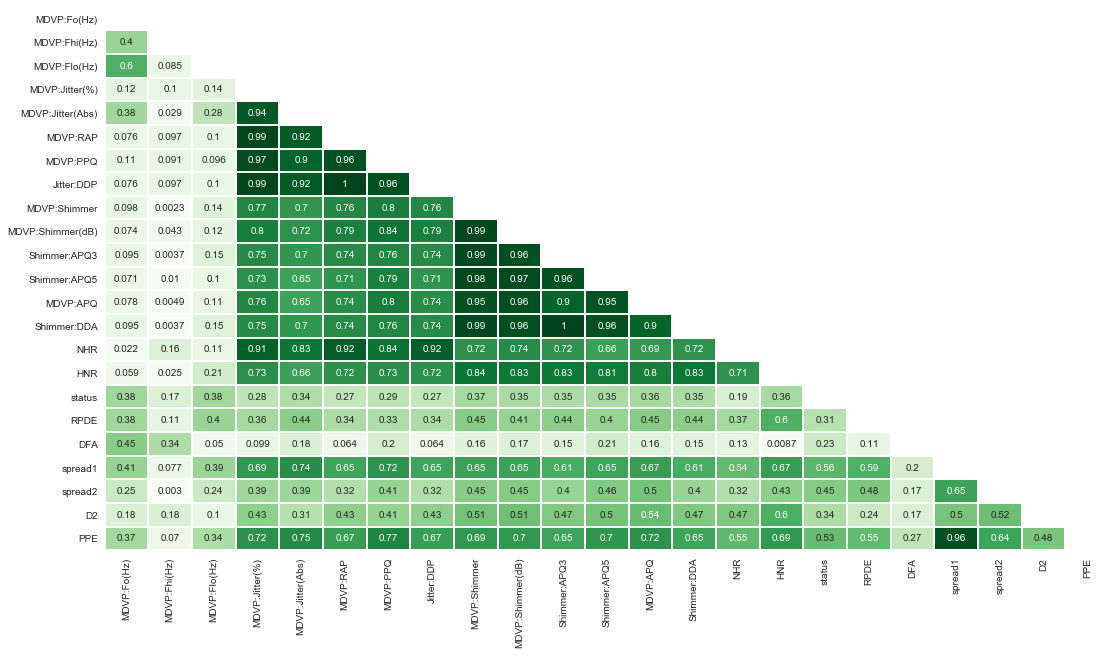

In [157]:
corr = abs(data.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (18,10))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Greens', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 90)   # Aesthetic purposes
plt.yticks(rotation = 0)   # Aesthetic purposes
plt.show()

- We see that there is a high correlation betweent the vocal fundamental frequency values
- There is a correlation of 1 between Shimmer DDA and Shimmer APQ3
- There is also a correlation of 1 between Jitter:DDP and MDVP-RAP
- There is very high correlation between MDVP Shimmer and other Shimmer columns
- Also high correlation between MDVP values
- Apart form that spread1 has a high correlation with PPE


In [158]:
data.drop(columns='name', inplace = True) #no particular function to play with the model
data.drop(columns='Shimmer:DDA', inplace = True) # high correlation =1 with another value 
data.drop(columns='Jitter:DDP', inplace = True) # high correlation =1 with another value

Dropping values from the dataset which does not add much value
- the name is a string field so does not add any predicitive capability. So dropping it
- the Shimmer:DDA and Jittter:DDP has a correlation of 1 with other columnsp; hence these columns will not add much value as the other column will be sufficient for the model.

### Checking for null values

In [159]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
PPE,0,0.0
Shimmer:APQ3,0,0.0
MDVP:Fhi(Hz),0,0.0
MDVP:Flo(Hz),0,0.0
MDVP:Jitter(%),0,0.0
MDVP:Jitter(Abs),0,0.0
MDVP:RAP,0,0.0
MDVP:PPQ,0,0.0
MDVP:Shimmer,0,0.0
MDVP:Shimmer(dB),0,0.0


Looking at the table we can see that there are no null values in the dataset

### Univariate Analysis

#### Vocal Fundamental Frequency

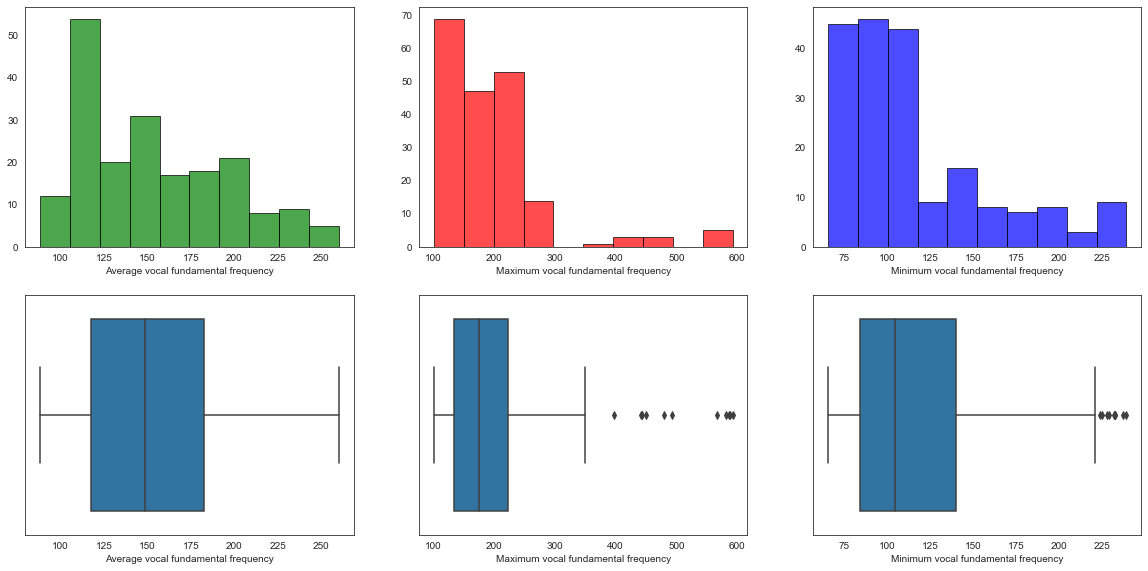

In [160]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data['MDVP:Fo(Hz)'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Average vocal fundamental frequency')

plt.subplot(3,3,2)
plt.hist(data['MDVP:Fhi(Hz)'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Maximum vocal fundamental frequency')

plt.subplot(3,3,3)
plt.hist(data['MDVP:Flo(Hz)'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Minimum vocal fundamental frequency')

plt.subplot(3,3,4)
sns.boxplot(x=data['MDVP:Fo(Hz)'])
plt.xlabel('Average vocal fundamental frequency')

plt.subplot(3,3,5)
sns.boxplot(x=data['MDVP:Fhi(Hz)'])
plt.xlabel('Maximum vocal fundamental frequency')

plt.subplot(3,3,6)
sns.boxplot(x=data['MDVP:Flo(Hz)'])
plt.xlabel('Minimum vocal fundamental frequency')
plt.show()

### We can see that 
- The average vocal fundamental frequency has a high frequency of 100-125 occuring more times than others.
- While the maximum vocal frequency is skewed towards 100-250 
- The minimum vocal freuqency is mostly occuring between 75-125  
- The average vocal fundamental frequency has no outliers and has values mostly between 125-175.
- The maximum vocal fundamental frequency has outliers with values > 350  and has values mostly between 150-225.
- The minimum vocal fundamental frequency has outliers with values > 225  and has values mostly between 80-150.

### Measures of variation in fundamental frequency

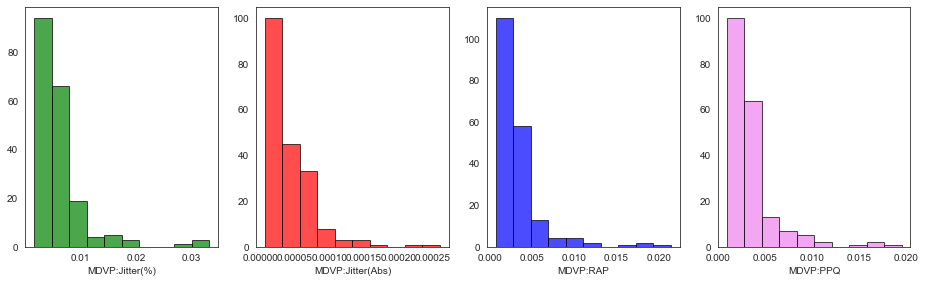

In [161]:
plt.figure(figsize= (20,15))
plt.subplot(3,5,1)
plt.hist(data['MDVP:Jitter(%)'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Jitter(%)')

plt.subplot(3,5,2)
plt.hist(data['MDVP:Jitter(Abs)'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Jitter(Abs)')

plt.subplot(3,5,3)
plt.hist(data['MDVP:RAP'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:RAP')
plt.subplot(3,5,4)
plt.hist(data['MDVP:PPQ'], color='violet', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:PPQ')

plt.show()

We can see that 
- most of the values are skewed towards 0 with 0-0.005 having most of the values with the exception of MDVP:Jitter(Abs) which has more values between 0 - 0.000050

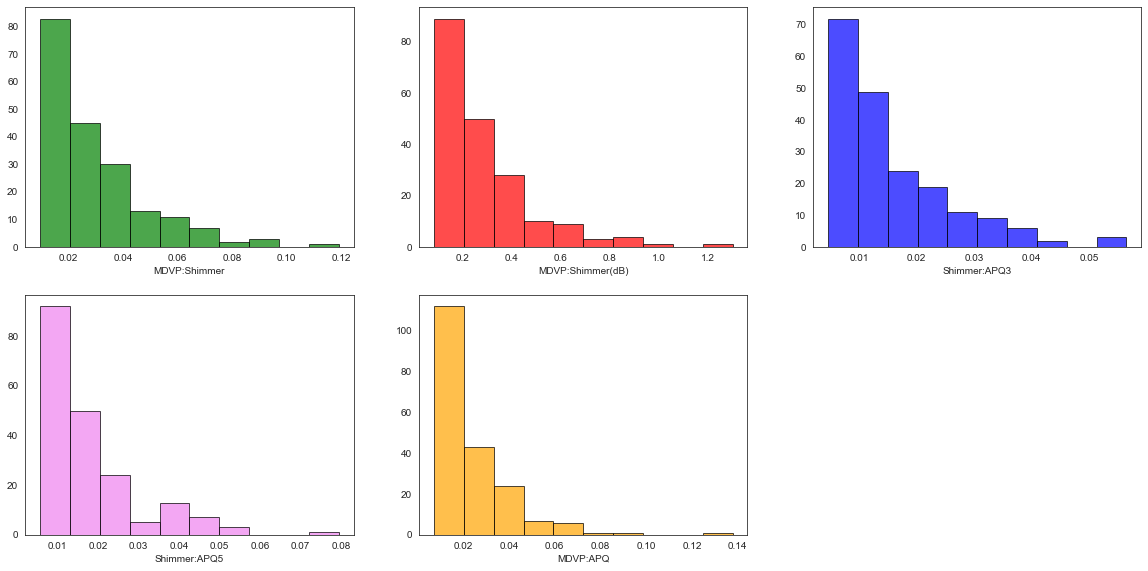

In [162]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data['MDVP:Shimmer'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Shimmer')

plt.subplot(3,3,2)
plt.hist(data['MDVP:Shimmer(dB)'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Shimmer(dB)')

plt.subplot(3,3,3)
plt.hist(data['Shimmer:APQ3'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:APQ3')
plt.subplot(3,3,4)
plt.hist(data['Shimmer:APQ5'], color='violet', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:APQ5')

plt.subplot(3,3,5)
plt.hist(data['MDVP:APQ'], color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:APQ')



plt.show()

- The analysis here as well is that the data is skewed towards 0 as we saw earlier. Most of the data is occuring between 0- 0.05 except in Shimmer:APQ5 and Shimmer:APQ3 which has value between 0-0.03.  

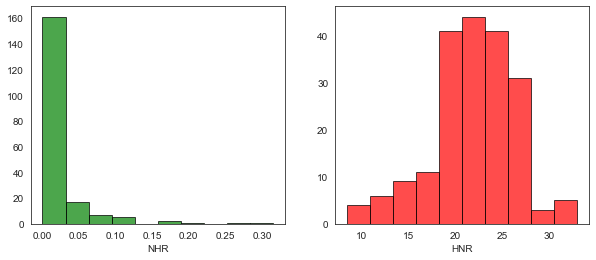

In [163]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.hist(data['NHR'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('NHR')

plt.subplot(1,2,2)
plt.hist(data['HNR'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('HNR')
plt.show()

We can see here that there is a stark contrast between NHR and HNR
-HNR has values between 20 to 30 occuring with high frequency in the dataset.
-NHR has values which are mostly around 0 occuring most of the time.

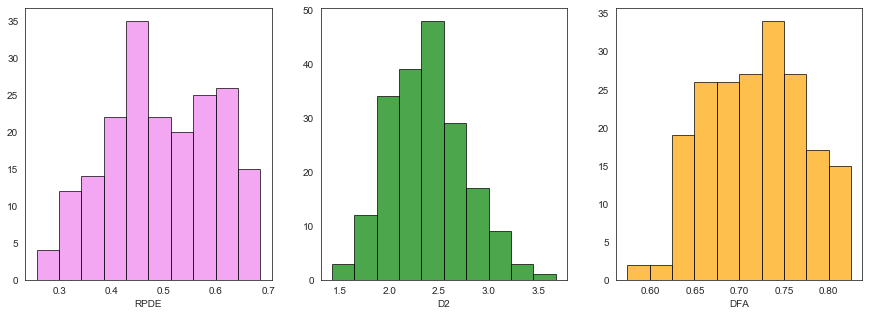

In [164]:
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
plt.hist(data['RPDE'], color='violet', edgecolor = 'black', alpha = 0.7)
plt.xlabel('RPDE')

plt.subplot(1,3,2)
plt.hist(data['D2'], color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('D2')

plt.subplot(1,3,3)
plt.hist(data['DFA'], color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('DFA')
plt.show()

The RPDE , D2, and DFA have distributions which are closer to normalized data distribution .Although the range is different in all the three columns with: 
- RPDE having values from 0.3 to 0.7.
- D2 having values between 1.5 to 3.5.
- DFA having values between 0.6 to 0.8.

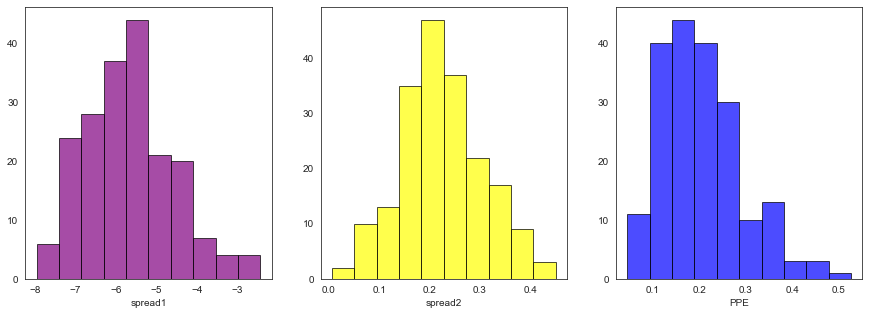

In [165]:
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
plt.hist(data['spread1'], color='purple', edgecolor = 'black', alpha = 0.7)
plt.xlabel('spread1')

plt.subplot(1,3,2)
plt.hist(data['spread2'], color='yellow', edgecolor = 'black', alpha = 0.7)
plt.xlabel('spread2')

plt.subplot(1,3,3)
plt.hist(data['PPE'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('PPE')
plt.show()

Again we see more of a normal distribution in the data of these columns.
- Spread1 has negative values only
- Spread2 & PPE has values less than 0.5 adn 0.6 respectively.


### Now let us look at the data distribution of the target column

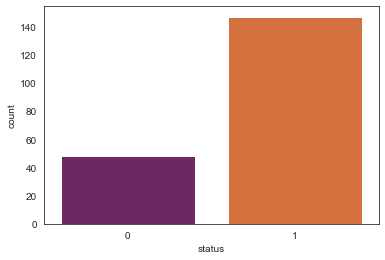

In [166]:
sns.countplot('status',data=data,palette='inferno')

As you can see there is a large difference in the  distribution of the target columns. It is heavily imbalanced. 
- This will make our model biased towards those data which have parkinson diseases.
- Since in this case it will lead to false positives and less false negatives it is not much of a problem.
- There are about 100 records more for people with parkinsions disease. 

### Standardizing the DATA and Splitting the data into Test and Train

In [167]:
from sklearn.preprocessing import StandardScaler
X = data.drop(columns='status')    # Predictors
y = data['status'] 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1,test_size=.30, stratify = y) # Split data into test and train
scaler = StandardScaler()   # A scaler function

#fitting the scaler funstion with train set
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Since we saw before that some values were having high values than others. It is a good method to standardize the data so that no particular columsn influence the model more. 
- The data is first split into a ratio of 70-30 (Train and Test).
- It is standardized to remove influence or bias.

### A function to test out models

In [168]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # for the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals
    
    cm=metrics.confusion_matrix(y_test, pred, labels=[0, 1]) #confusion matrix stored for heatmap visualization
    Dfcm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
    
    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)
    error = round((fp+fn)/(tp+tn+fp+fn),3)
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score, recall, precision,error, specificity, f1_score ,Dfcm # return all the metrics
    

Since we will be using multiple models . Instead of writing the same code multiple times. We can just pass and get all the computations done in single code. The parameters and model are passed as parameters and the method gives the score, recall precision ,error rate, specifity, f1 score and confusion matrix of the model.

In [169]:
# lOGISTIC REGRESSION
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy, lr_recall, lr_precision,lr_error, lr_specificity, lr_f1_score,lr_Dfcm = fit_n_print(lr, X_train_scaled, X_test_scaled, y_train, y_test)

#KNN 
knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision,knn_error, knn_specificity, knn_f1_score ,knn_Dfcm= fit_n_print(knn, X_train_scaled, X_test_scaled, y_train, y_test )

# NAIVE BAYES'
nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision,nb_error, nb_specificity, nb_f1_score,nb_Dfcm = fit_n_print(nb, X_train_scaled, X_test_scaled, y_train, y_test )

#SVM
svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision,svm_error, svm_specificity, svm_f1_score,svm_Dfcm = fit_n_print(svm, X_train_scaled, X_test_scaled, y_train, y_test )

In [170]:
print('Standard Classification Algortihms')
result1 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                           'Error Rate':[lr_error ,  knn_error ,  nb_error ,  svm_error],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result1

Standard Classification Algortihms


,Model,Accuracy,Recall,Precision,Error Rate,Specificity,F1 Score
0,Logistic Regression,0.847,0.886,0.907,0.153,0.733,0.896
1,KNN,0.932,0.977,0.935,0.068,0.800,0.956
2,Naive Bayes',0.729,0.705,0.912,0.271,0.800,0.795
3,SVM,0.881,1.000,0.863,0.119,0.533,0.926


- All the models have good accuracies and recall except for Naive Bayes'
- Naive Bayes' model works better when most of the features are independant of each other and there are more categorical features.
- The precsion for all the models is pretty high.
- Error rate is also low mostly with naive bayes having the highest.
- There are a few thing that we can do to get better predictions for Naive Bayes
- We can use more sophisticated models
- We can play with the features aka feature engineering
- We can play with the hyperparameters of the models that we already used

We can try to increase of the model by dropping columns which have high correlation.

In [171]:
dataNB=data
dataNB.drop(columns='MDVP:Jitter(Abs)',inplace=True)
dataNB.drop(columns='MDVP:PPQ',inplace=True)
dataNB.drop(columns='MDVP:Shimmer(dB)',inplace=True)
dataNB.drop(columns='MDVP:APQ',inplace=True)
dataNB.drop(columns='Shimmer:APQ5',inplace=True)

In [172]:
X1 = dataNB.drop(columns='status')    # Predictors
y1 = dataNB['status'] 
X_train, X_test, y_train, y_test = train_test_split(X1,y1, random_state = 1,test_size=.30, stratify = y) # Split data into test and train
scaler = StandardScaler()   # A scaler function

#fitting the scaler funstion with train set
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# lOGISTIC REGRESSION
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy, lr_recall, lr_precision,lr_error, lr_specificity, lr_f1_score,lr_Dfcm = fit_n_print(lr, X_train_scaled, X_test_scaled, y_train, y_test)

#KNN 
knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision,knn_error, knn_specificity, knn_f1_score ,knn_Dfcm= fit_n_print(knn, X_train_scaled, X_test_scaled, y_train, y_test )

# NAIVE BAYES'
nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision,nb_error, nb_specificity, nb_f1_score,nb_Dfcm = fit_n_print(nb, X_train_scaled, X_test_scaled, y_train, y_test )

#SVM
svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision,svm_error, svm_specificity, svm_f1_score,svm_Dfcm = fit_n_print(svm, X_train_scaled, X_test_scaled, y_train, y_test )

In [173]:
print('Standard Classification Algortihms 2')
result2 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                           'Error Rate':[lr_error ,  knn_error ,  nb_error ,  svm_error],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result2


Standard Classification Algortihms 2


,Model,Accuracy,Recall,Precision,Error Rate,Specificity,F1 Score
0,Logistic Regression,0.864,0.932,0.891,0.136,0.667,0.911
1,KNN,0.932,0.977,0.935,0.068,0.800,0.956
2,Naive Bayes',0.712,0.682,0.909,0.288,0.800,0.779
3,SVM,0.864,0.977,0.860,0.136,0.533,0.915


As we can see here dropping the columns having high correlation has paid off as Naive Bayes's, SVM's and Logistic Regression accuracy has increased although KNN has the same accuracy. 
- Naive Bayes' accuracy decreased by 1%  and SVM by 2% but Logistic regression increased by 2%
- It hasnt' seemed to effect KNN

### Meta Classifier using the base models as the models used till now

In [174]:
from vecstack import stacking
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1,test_size=.30, stratify = y) # Split data into test and train
scaler = StandardScaler()   # A scaler function

#fitting the scaler funstion with train set
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [
    GaussianNB(),
    SVC(gamma = 'auto', kernel= 'poly', degree=2),
    LogisticRegression(solver = 'liblinear'),
    KNeighborsClassifier(),

    ]
    
S_train, S_test = stacking(models,                   
                           X_train_scaled, y_train, X_test_scaled,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [GaussianNB]
    fold  0:  [0.61764706]
    fold  1:  [0.64705882]
    fold  2:  [0.70588235]
    fold  3:  [0.82352941]
    ----
    MEAN:     [0.69852941] + [0.07885151]
    FULL:     [0.69852941]

model  1:     [SVC]
    fold  0:  [0.85294118]
    fold  1:  [0.82352941]
    fold  2:  [0.85294118]
    fold  3:  [0.79411765]
    ----
    MEAN:     [0.83088235] + [0.02438695]
    FULL:     [0.83088235]

model  2:     [LogisticRegression]
    fold  0:  [0.82352941]
    fold  1:  [0.70588235]
    fold  2:  [0.88235294]
    fold  3:  [0.85294118]
    ----
    MEAN:     [0.81617647] + [0.06698848]
    FULL:     [0.81617647]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.82352941]
    fold  1:  [0.79411765]
    fold  2:  [0.85294118]
    fold  3:  [0.91176471]
    ----
    MEAN:     [0.84558824] + [0.04350059]
    FULL:     [0.84558824]



#### As we can see the stacking models has stacked and given its predictions into S_test and S_train.
Let us try it out in our other models.

In [175]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [176]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
model=model.fit(S_train, y_train)
y_pred = model.predict(S_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()  # compute the confusion matrix from the predictions and actuals
    
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]) #confusion matrix stored for heatmap visualization
st_Dfcm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
st_accuracy=accuracy_score(y_test, y_pred)
st_recall = round(tp/(tp+fn), 3)   
st_precision = round(tp/(tp+fp), 3)
st_error = round((fp+fn)/(tp+tn+fp+fn),3)
st_specificity =round(tn/(tn+fp),3) 
st_f1_score =  round(2*st_precision*st_recall/(st_precision + st_recall), 3)

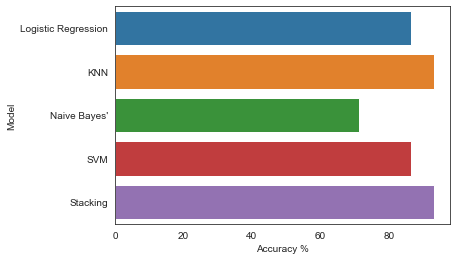

In [177]:
result3 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM', 'Stacking'],
                          'Accuracy %': [ lr_accuracy*100 ,  knn_accuracy*100 ,  nb_accuracy*100 ,  svm_accuracy*100,st_accuracy*100 ],
                       })
sns.barplot(x="Accuracy %", y="Model", data=result3)


As we see here the Meta Classifier (stacking) has given very high accuracy .It is similiar to the KNN algorithm's accuracy. So stacking is considered a good way to increase the accuracy by combining models.

### Ensemble Models

Now we will look into Ensemble Models like
Decision Tree, Boosting, Bagging And Random Forest and train them using the same function we used earlier

In [183]:

X_train, X_test, y_train, y_test = train_test_split(X1,y1, random_state = 1,test_size=.30, stratify = y1) # Split data into test and train
scaler = StandardScaler()   # A scaler function

#fitting the scaler funstion with train set
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR_accuracy,dTreeR_recall, dTreeR_precision,dTreeR_error ,dTreeR_specificity, dTreeR_f1_score,dTreeR_Dfcm=fit_n_print(dTreeR, X_train_scaled, X_test_scaled, y_train, y_test )

bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
bgcl_accuracy,bgcl_recall ,bgcl_precision,bgcl_error, bgcl_specificity, bgcl_f1_score,bgcl_Dfcm=fit_n_print(bgcl, X_train_scaled, X_test_scaled, y_train, y_test )


abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl_accuracy,abcl_recall,abcl_precision,abcl_error,  abcl_specificity, abcl_f1_score,abcl_Dfcm=fit_n_print(abcl, X_train_scaled, X_test_scaled, y_train, y_test )


gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl_accuracy, gbcl_recall, gbcl_precision,gbcl_error, gbcl_specificity, gbcl_f1_score,gbcl_Dfcm=fit_n_print(gbcl, X_train_scaled, X_test_scaled, y_train, y_test )

rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_accuracy, rfcl_recall, rfcl_precision,rfcl_error, rfcl_specificity, rfcl_f1_score, rfcl_Dfcm=fit_n_print(rfcl, X_train_scaled, X_test_scaled, y_train, y_test )

In [184]:
result3 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM','Stacking','Decision tree', 'Bagging','AdaBoosting','Gradient Boosting','Random Forest'],
                          'Accuracy %': [ lr_accuracy*100 ,  knn_accuracy*100 ,  nb_accuracy*100 ,  svm_accuracy*100,st_accuracy*100, dTreeR_accuracy*100,bgcl_accuracy*100,abcl_accuracy*100,gbcl_accuracy*100,rfcl_accuracy*100 ],
                          'Recall %' : [lr_recall*100 ,  knn_recall*100 ,  nb_recall*100 ,  svm_recall*100,st_recall*100,dTreeR_recall*100,bgcl_recall*100,abcl_recall*100,gbcl_recall*100,rfcl_recall*100 ],
                          'Precision %': [lr_precision*100 ,  knn_precision*100 ,  nb_precision*100 ,  svm_precision*100,st_precision*100,dTreeR_precision*100 ,bgcl_precision*100,abcl_precision*100,gbcl_precision*100,rfcl_precision*100],
                          'Error Rate':[lr_error ,  knn_error ,  nb_error ,  svm_error ,st_error,dTreeR_error,bgcl_error,abcl_error,gbcl_error,rfcl_error],
                        'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ,st_specificity,dTreeR_specificity,bgcl_specificity,abcl_specificity,gbcl_specificity,rfcl_specificity],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score,st_f1_score,dTreeR_f1_score,bgcl_f1_score,abcl_f1_score,gbcl_f1_score,rfcl_f1_score]})
result3

,Model,Accuracy %,Recall %,Precision %,Error Rate,Specificity,F1 Score
0,Logistic Regression,86.400000,93.2,89.1,0.136,0.667,0.911
1,KNN,93.200000,97.7,93.5,0.068,0.800,0.956
2,Naive Bayes',71.200000,68.2,90.9,0.288,0.800,0.779
3,SVM,86.400000,97.7,86.0,0.136,0.533,0.915
4,Stacking,93.220339,97.7,93.5,0.068,0.800,0.956
5,Decision tree,83.100000,93.2,85.4,0.169,0.533,0.891
6,Bagging,89.800000,95.5,91.3,0.102,0.733,0.934
7,AdaBoosting,88.100000,95.5,89.4,0.119,0.667,0.923
8,Gradient Boosting,94.900000,100.0,93.6,0.051,0.800,0.967
9,Random Forest,93.200000,95.5,95.5,0.068,0.867,0.955


As we can see here the Gradient Boosting has a 100% recall rate which means no False negatives were predicted and 94.9% accuracy which is the highest among the models.
Also Gradient boosting has the least error rate which shows that Gradient Boosting is the best model to classify data for this model.
Models such as Random Forest , Stacking and KNN also fare well with good accuracy , recall and less error rate.


### Plotting the accuracy, recall and precision visually for each model

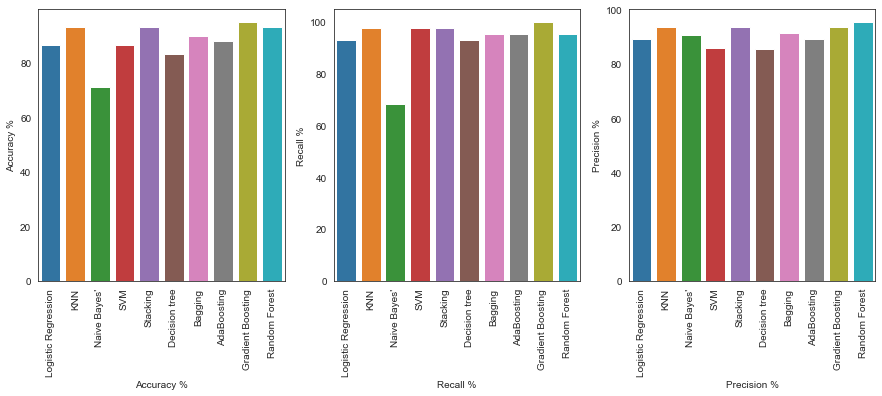

In [186]:
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.barplot(x="Model", y="Accuracy %", data=result3)
plt.xticks(rotation = 90) 
plt.xlabel('Accuracy %')
plt.subplot(1,3,2)
sns.barplot(x="Model", y="Recall %", data=result3)
plt.xticks(rotation = 90) 
plt.xlabel('Recall %')
plt.subplot(1,3,3)
sns.barplot(x="Model", y="Precision %", data=result3)
plt.xticks(rotation = 90) 
plt.xlabel('Precision %')


plt.show()

- As we said before the Gradient Boosting, Random Forest, AdaBoosting, Stacking and KNN have pretty much high accuracy. The Naive Bayes' is the only one which is below 80
- The recall percentage is high for all the models again with only Naive Bayes lacking behind.
- The precision percentage for all the models show high numbers which means that there are less false positive predictions.

### Visualizing the Error Rate, Specificity, F1 Score of all the models

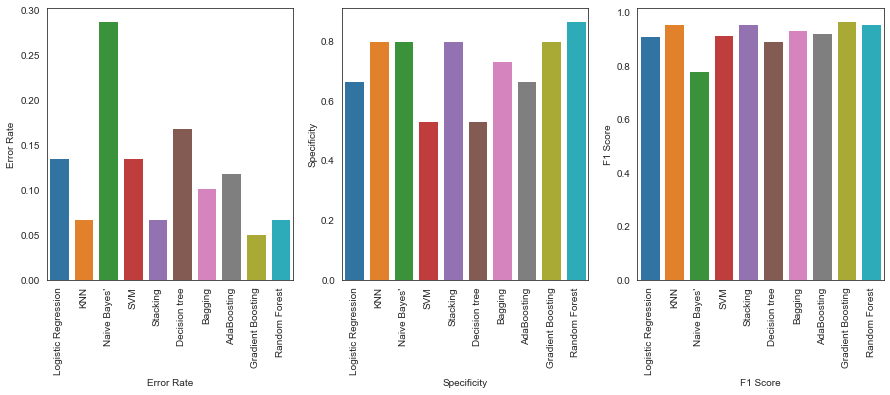

In [187]:
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.barplot(x="Model", y="Error Rate", data=result3)
plt.xticks(rotation = 90)
plt.xlabel('Error Rate')
plt.subplot(1,3,2)
sns.barplot(x="Model", y="Specificity", data=result3)
plt.xticks(rotation = 90) 
plt.xlabel('Specificity')
plt.subplot(1,3,3)
sns.barplot(x="Model", y="F1 Score", data=result3)
plt.xticks(rotation = 90) 
plt.xlabel('F1 Score')

plt.show()

- The error rate graph shows that Naive Bayes' and Decision Tree have more error rate with all the other models performing with much less error 
- The specificity graph shows that Random Forest has the highest followed by Gradient Boosting, Stacking, KNN and Naive Bayes' which shows that the False positives have been less in these models.
- The f1 score shows that apart from Naive Bayes' all the other models have a good score.

### Visualizing Heat Maps for each model.

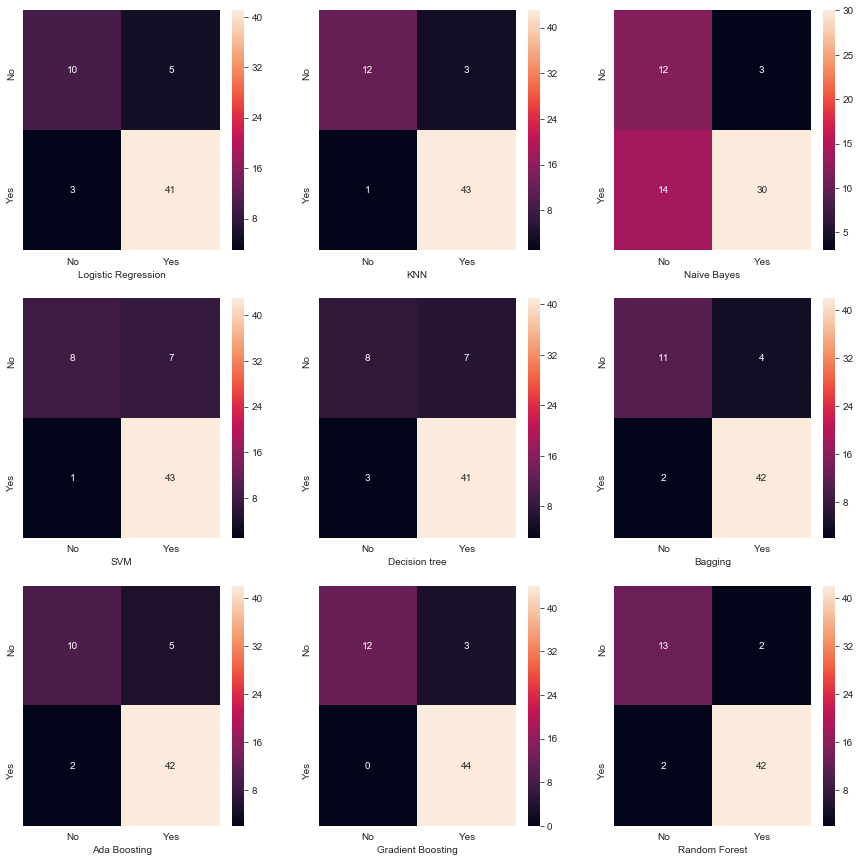

In [188]:
plt.figure(figsize= (15,15))
plt.subplot(3,3,1)
sns.heatmap(lr_Dfcm, annot=True ,fmt='g')

plt.xlabel('Logistic Regression')
plt.subplot(3,3,2)
sns.heatmap(knn_Dfcm, annot=True ,fmt='g')

plt.xlabel('KNN')
plt.subplot(3,3,3)
sns.heatmap(nb_Dfcm, annot=True ,fmt='g')
 
plt.xlabel('Naive Bayes')

plt.subplot(3,3,4)
sns.heatmap(svm_Dfcm, annot=True ,fmt='g')

plt.xlabel('SVM')
plt.subplot(3,3,5)
sns.heatmap(dTreeR_Dfcm, annot=True ,fmt='g')

plt.xlabel('Decision tree')
plt.subplot(3,3,6)
sns.heatmap(bgcl_Dfcm, annot=True ,fmt='g')
 
plt.xlabel('Bagging')

plt.subplot(3,3,7)
sns.heatmap(abcl_Dfcm, annot=True ,fmt='g')

plt.xlabel('Ada Boosting')
plt.subplot(3,3,8)
sns.heatmap(gbcl_Dfcm, annot=True ,fmt='g')

plt.xlabel('Gradient Boosting')
plt.subplot(3,3,9)
sns.heatmap(rfcl_Dfcm, annot=True ,fmt='g')
 
plt.xlabel('Random Forest')

plt.show()

- As we see here as well the Naive Bayes models is the onyl one which has mroe false negatives anf False Positives.
- All the other models seem to perform well.
- The gradietn boosting models has 0 false positives and also only 3 false negatives.
- The Random Forest model also has only 4 falsely classified values (2 each)

##  Conclusion

After reveiwing all the models we have seen that for this particular dataset the Gradient Boosting Model works much better as compared to others.
- The Random Forest model also works very well.

#### So in terms of Priority the choices are:
- Gradient Boosting
- Random Forest
- Bagging

#### Personally I would go with Gradient Boosting with this model.

### Thank You